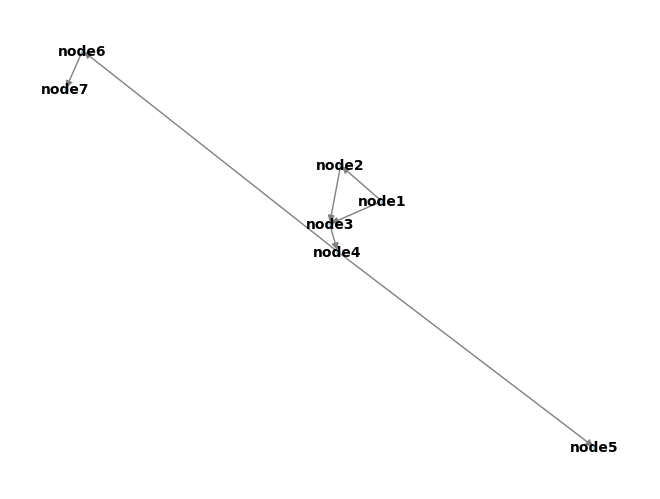

In [1]:
from observed_dict_rs import Node, Edge, Vertex
import networkx as nx

g = Vertex()

node1 = g.add_node('node1', {'value': 1})
node2 = g.add_node('node2', {'value': 2})
node3 = g.add_node('node3', {'value': 3})
node4 = g.add_node('node4', {'value': 4})
node5 = g.add_node('node5', {'value': 5})

edge1 = g.add_edge('node1', 'node2', {'weight': 1.0})
edge2 = g.add_edge('node2', 'node3', {'weight': 2.0})
edge3 = g.add_edge('node1', 'node3', {'weight': 3.0})
edge4 = g.add_edge('node3', 'node4', {'weight': 4.0})
edge5 = g.add_edge('node4', 'node5', {'weight': 4.0})

node6 = g.add_node('node6', {'value': 6})
edge6 = g.add_edge('node4', 'node6', {'weight': 4.0})
node7 = g.add_node('node7', {'value': 7})
edge7 = g.add_edge('node6', 'node7', {'weight': 4.0})

nx_graph1 = g.to_networkx()
nx.draw(nx_graph1, with_labels=True, pos=nx.spring_layout(nx_graph1), node_size=5, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', edge_color='gray')

In [2]:
nx_graph1.edges

OutEdgeView([('node1', 'node2'), ('node1', 'node3'), ('node3', 'node4'), ('node6', 'node7'), ('node2', 'node3'), ('node4', 'node5'), ('node4', 'node6')])

In [3]:
g["node1"].edges

[unknown: node1 --> node2, unknown: node1 --> node3]

In [4]:
# Test direct path (node1 to node5)
direct_path = g.shortest_path_bfs('node1', 'node5')
print(f"Direct path from node1 to node2: {direct_path}")

Direct path from node1 to node2: Vertex(node4, node3, node1, node5)


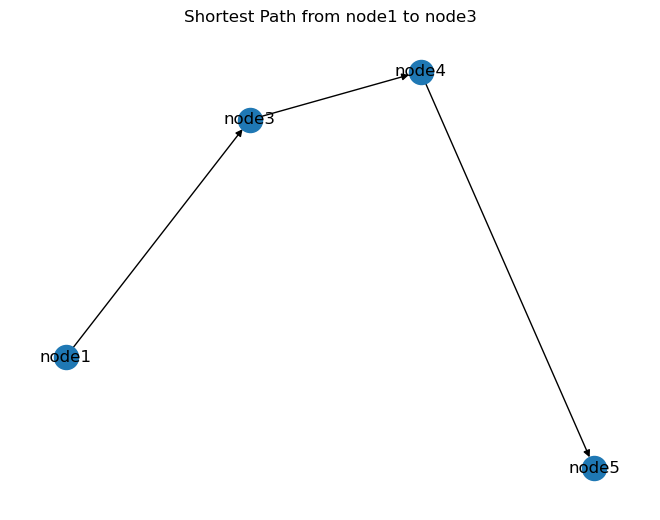

In [5]:
import networkx as nx

nx_graph2 = direct_path.to_networkx()
nx.draw(nx_graph2, with_labels=True)
import matplotlib.pyplot as plt
plt.title("Shortest Path from node1 to node3")
plt.show()

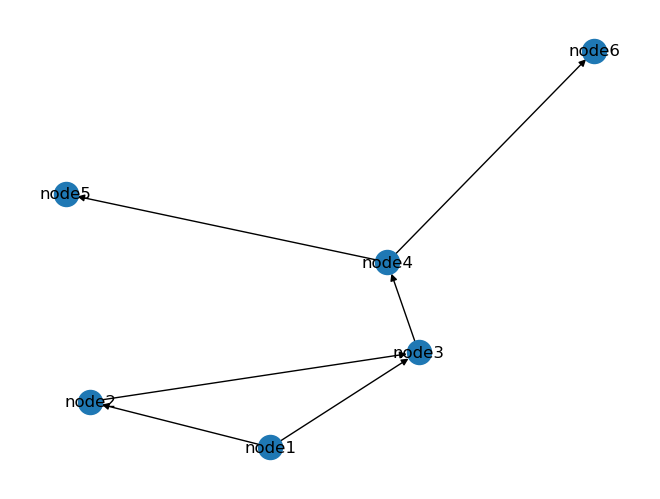

In [6]:

nx_graph3 = direct_path.expand(g, 1).to_networkx()

# plot
nx.draw(
    nx_graph3, 
    with_labels=True, 
    pos=nx.spring_layout(nx_graph3, iterations=10)
)

In [7]:
expanded = direct_path.expand(g, 1)

expanded.save_to_json("./example_graph.json")

reloaded_expanded = Vertex().load_from_json("./example_graph.json")

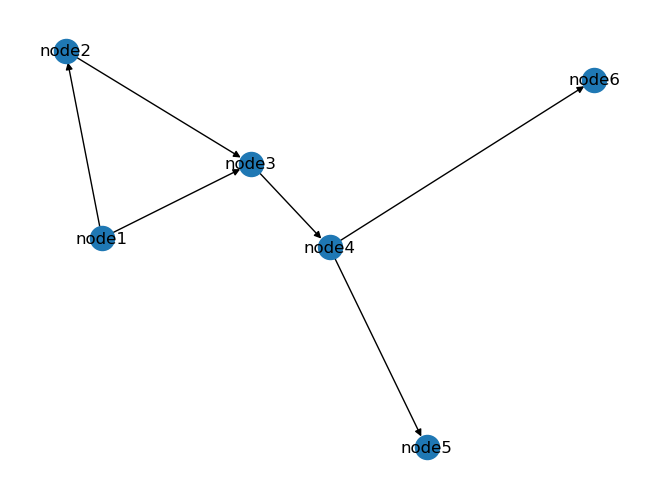

In [8]:
nx_graph4 = reloaded_expanded.to_networkx()
nx.draw(
    nx_graph4, 
    with_labels=True, 
    pos=nx.spring_layout(nx_graph3, iterations=10)
)

In [13]:
v = Vertex()


# create a callback that allows self and node to be passed
def __callback(vertex, node):
    # FIXED: Need to reassign the entire meta dict for changes to persist
    if "visited_nodes" not in vertex.meta:
        vertex.meta["visited_nodes"] = []
    vertex.meta["visited_nodes"].append(node.id)
    return True  # Continue traversal


v.on_node_add_callbacks.append(__callback)
print(v.on_node_add_callbacks)

v.add_node('node1', {'value': 1})
v.add_node('node2', {'value': 2})
v.add_node('node3', {'value': 3})
v.add_edge('node1', 'node2', {'weight': 1.0})
v.add_edge('node2', 'node3', {'weight': 2.0})

print(v.meta)

[<function __callback at 0x7c637bc3bce0>]
{'visited_nodes': ['node1', 'node2', 'node3']}


In [14]:
v.nodes

{'node2': node2, 'node1': node1, 'node3': node3}

In [15]:
v.filter(["node2"]).expand(v, 1)

Vertex(node3, node2)